# **Problem Statement**

Farmers who grow potatos are facing lot a of economical losses every year because of various diseases that can happen to a potato plant. There are two common diseases known as Early Blight and Late Blight. If farmers can detect these diseases early and apply approriate treatment then it can save lot of waste and prevent economical losses.

You have decided to build a mobile application that uses deep learning  and CCN to predict wheather it is healty or got diseses.

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
EPOCHS =50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Potato Disease Classification/PlantVillage',
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=32)

Found 2880 files belonging to 4 classes.


In [5]:
class_name=dataset.class_names

In [6]:
class_name

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Unclassified']

In [7]:
len(dataset)     # 68*32 = 2176

90

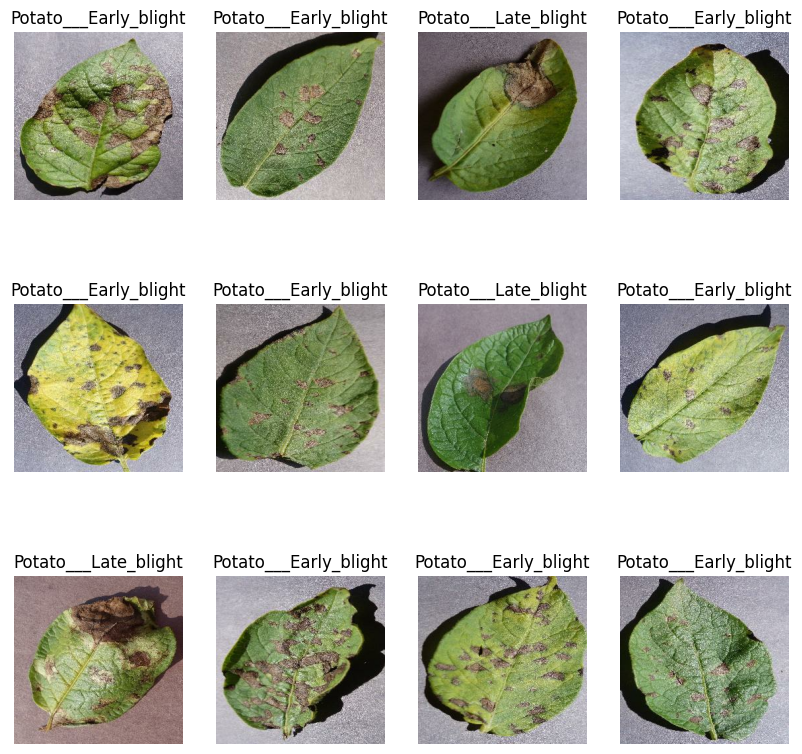

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype(int))
    plt.title(class_name[label_batch[i]])
    plt.axis("off")

In [9]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [10]:
train_size =0.8
len(dataset)*train_size

72.0

In [11]:
Train_ds = dataset.take(54)

In [12]:
Test_ds = dataset.skip(54)
len(Test_ds)

36

In [13]:
val_size = 0.1
len(dataset)*val_size

9.0

In [14]:

val_ds = Test_ds.take(6)
len(val_ds)

6

In [15]:
Test_ds = Test_ds.skip(6)
len(Test_ds)

30

In [16]:
def get_dataset_partions_tf(ds,train_split=0.8,val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size= len(ds)

  if shuffle:
   ds=ds.shuffle(shuffle_size,seed=12)
  train_size = int(ds_size*train_split)
  val_size = int(ds_size*val_split)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = get_dataset_partions_tf(dataset)

In [18]:
len(train_ds)

72

In [19]:
len(val_ds)

9

In [20]:
len(test_ds)

9

In [21]:
# layers for resize and rescale
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])

In [22]:
# layers for data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])



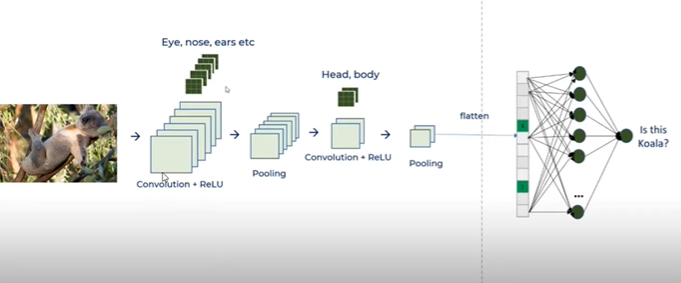

## Model Building:


In [23]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(4, activation='softmax'),  # <-- changed from 3 to 4
])

model.build(input_shape=(32,IMAGE_SIZE,IMAGE_SIZE,3))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
              metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,
                     epochs=EPOCHS,
                     verbose=1,
                     batch_size=32,
                     validation_data=val_ds)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 96s 164ms/step - accuracy: 0.5099 - loss: 1.0474 - val_accuracy: 0.7708 - val_loss: 0.5444
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 69s 174ms/step - accuracy: 0.8477 - loss: 0.4466 - val_accuracy: 0.6250 - val_loss: 0.8074
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.8539 - loss: 0.4057 - val_accuracy: 0.8819 - val_loss: 0.3252
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 171ms/step - accuracy: 0.9043 - loss: 0.2488 - val_accuracy: 0.8924 - val_loss: 0.2990
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - accuracy: 0.9410 - loss: 0.1527 - val_accuracy: 0.8264 - val_loss: 0.3471
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.9439 - loss: 0.1522 - val_accuracy: 0.8438 - val_loss: 0.3459
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - accuracy: 0.9649 - loss: 0.1011 - val_accuracy: 0.9236 - val_loss: 0.1841
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.9591 - loss: 0.1187 - val_accu

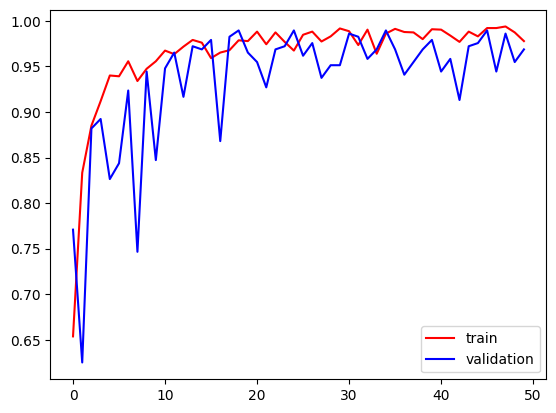

In [27]:
  import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
 import numpy as np

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
predicted label: Potato___Early_blight


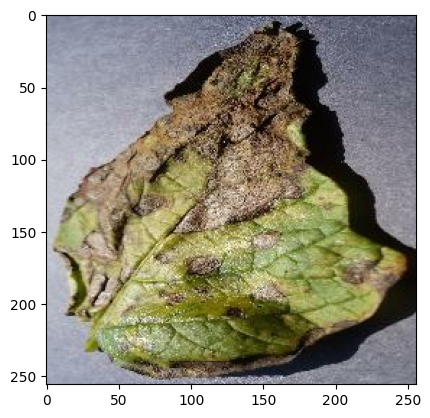

In [29]:
for image_batch,label_batch in test_ds.take(1):
  first_iamge = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_iamge)
  print('actual label:',class_name[first_label])

  batch_prediction = model.predict(image_batch)
  print('predicted label:',class_name[np.argmax(batch_prediction[0])])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


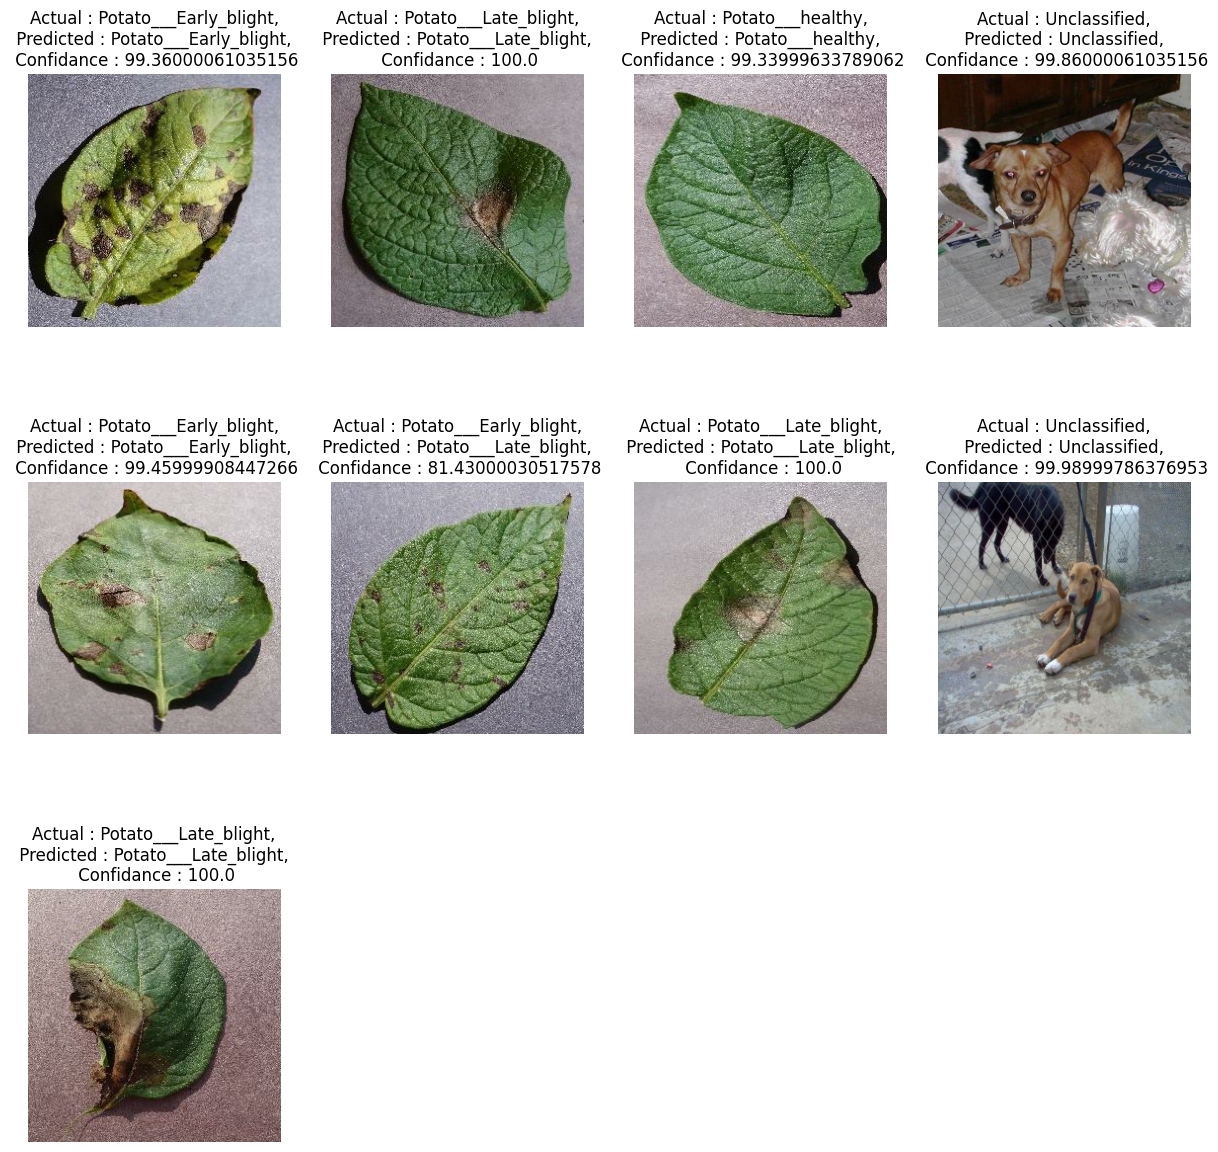

In [30]:
plt.figure(figsize=(15,15))
for image,label in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.axis('off')
    batch_predictions = model.predict(image)
    actual_class =class_name[label[i]]
    predicted_class = class_name[np.argmax(batch_predictions[i])]
    confidance = round(100*(np.max(batch_predictions[i])),2)

    plt.title(f'Actual : {actual_class},\n Predicted : {predicted_class}, \n Confidance : {confidance}' )


In [32]:
model_version = 'potato_disease_v01'
model.save(f"{model_version}.keras")